In [28]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit #%timeit beore code line
from citipy import citipy
%matplotlib inline

import requests
#import api key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# unpack zip object into a list 
# (You can only unzip a zipped tuple once before 
#     it is removed from the computer’s memory.)

coordinates = list(lat_lngs)
coordinates[4]

(32.31457547727146, -51.2552799152017)

In [4]:
# Match coordinates up with cities using citipy
# Create a list for holding the cities.
# to fix : costal cities are favored as 70% coordinates are water

cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

644

In [5]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | lokomotivnyy
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | ozinki
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | srednekolymsk
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | grand forks
Processing Record 13 of Set 1 | labuhan
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | awash
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | portales
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | ust-nera
Processing Record

Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | wanning
Processing Record 44 of Set 4 | kachiry
Processing Record 45 of Set 4 | quatre cocos
Processing Record 46 of Set 4 | ambulu
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | nichinan
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | along
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | kuryk
Processing Record 3 of Set 5 | adjumani
Processing Record 4 of Set 5 | xinzhi
Processing Record 5 of Set 5 | altamira
Processing Record 6 of Set 5 | manacapuru
Processing Record 7 of Set 5 | howell
Processing Record 8 of Set 5 | isabela
Processing Record 9 of Set 5 | bayir
Processing Record 10 of Set 5 | kuche
City not found. Skipping...
Processing Record 11 of Set 5 | turka
Processing Record 12 of Set 5 | csenger
Processing Record 13 of Set 5 | utiroa
City not found. Skipping...
Processing Record 14 of Set 5

Processing Record 34 of Set 8 | college
Processing Record 35 of Set 8 | kendari
Processing Record 36 of Set 8 | puerto escondido
Processing Record 37 of Set 8 | kyzyl
Processing Record 38 of Set 8 | yangambi
Processing Record 39 of Set 8 | nushki
Processing Record 40 of Set 8 | terrak
Processing Record 41 of Set 8 | mariana
Processing Record 42 of Set 8 | kinablangan
Processing Record 43 of Set 8 | goderich
Processing Record 44 of Set 8 | kytlym
City not found. Skipping...
Processing Record 45 of Set 8 | fare
Processing Record 46 of Set 8 | almeirim
Processing Record 47 of Set 8 | sterlibashevo
Processing Record 48 of Set 8 | taoudenni
Processing Record 49 of Set 8 | aasiaat
Processing Record 50 of Set 8 | wewak
Processing Record 1 of Set 9 | murakami
Processing Record 2 of Set 9 | hibbing
Processing Record 3 of Set 9 | manokwari
Processing Record 4 of Set 9 | walvis bay
Processing Record 5 of Set 9 | derzhavinsk
Processing Record 6 of Set 9 | maturin
Processing Record 7 of Set 9 | arm

Processing Record 22 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 23 of Set 12 | parfino
Processing Record 24 of Set 12 | buraydah
Processing Record 25 of Set 12 | chulman
Processing Record 26 of Set 12 | nanakuli
Processing Record 27 of Set 12 | salzwedel
Processing Record 28 of Set 12 | tibati
Processing Record 29 of Set 12 | richards bay
Processing Record 30 of Set 12 | stoyba
City not found. Skipping...
Processing Record 31 of Set 12 | ajaccio
Processing Record 32 of Set 12 | karaul
City not found. Skipping...
Processing Record 33 of Set 12 | wahiawa
Processing Record 34 of Set 12 | pringsewu
Processing Record 35 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 36 of Set 12 | qaqortoq
Processing Record 37 of Set 12 | mattru
Processing Record 38 of Set 12 | baykit
Processing Record 39 of Set 12 | san andres
Processing Record 40 of Set 12 | faya
Processing Record 41 of Set 12 | temaraia
City not found. Skipping...
Processing Record 42 of Set 1

In [7]:
len(city_data)

590

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-05-26 13:37:35,-34.42,19.23,57.00,61,94,7.00
1,Lokomotivnyy,RU,2020-05-26 13:37:35,53.01,60.57,67.75,47,0,13.09
2,Ancud,CL,2020-05-26 13:37:35,-41.87,-73.82,55.99,100,75,4.70
3,Ozinki,RU,2020-05-26 13:37:35,51.18,49.68,76.42,62,53,17.38
4,Saint George,US,2020-05-26 13:36:26,37.10,-113.58,62.01,21,1,6.93
5,Cherskiy,RU,2020-05-26 13:37:35,68.75,161.30,39.70,66,0,5.12
6,Georgetown,MY,2020-05-26 13:37:36,5.41,100.34,84.00,88,40,2.24
7,Kapaa,US,2020-05-26 13:37:36,22.08,-159.32,69.80,94,1,5.82
8,Klaksvik,FO,2020-05-26 13:37:36,62.23,-6.59,48.20,81,0,8.05
9,Srednekolymsk,RU,2020-05-26 13:37:36,67.45,153.68,47.12,51,0,8.12


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'05/26/20'

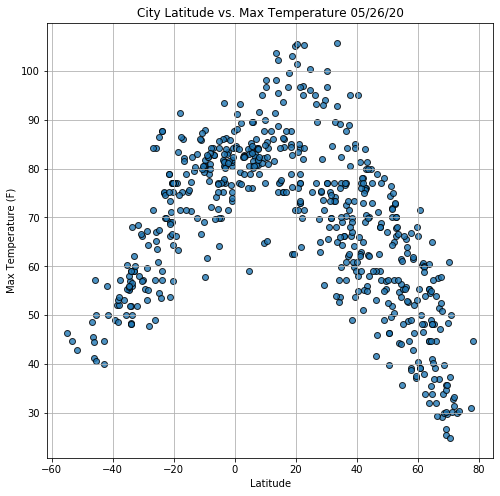

In [23]:
# Build the scatter plot for latitude vs. max temperature.



plt.figure(figsize=(8,8))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

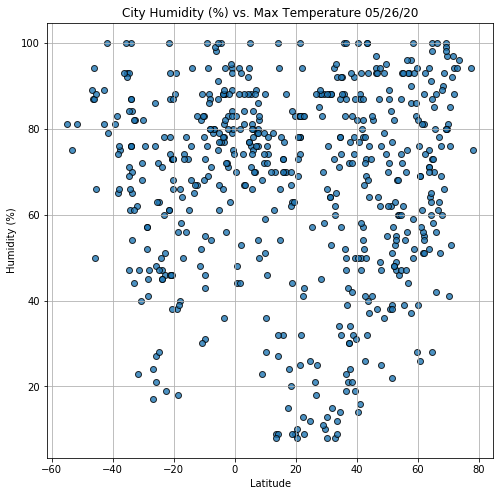

In [24]:
# Build the scatter plot for hummidity vs. max temperature.

plt.figure(figsize=(8,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Humidity (%) vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

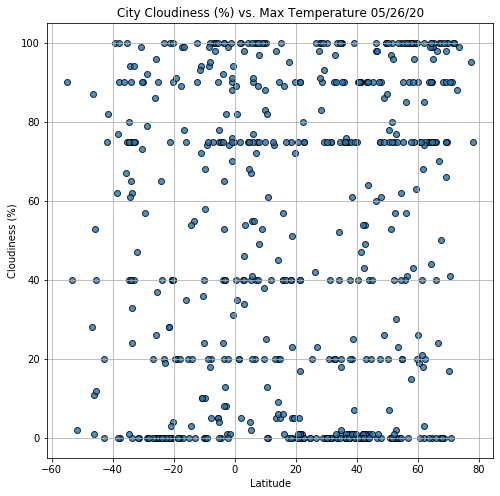

In [25]:
# Build the scatter plot for clowdyness vs. max temperature.

plt.figure(figsize=(8,8))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Cloudiness (%) vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

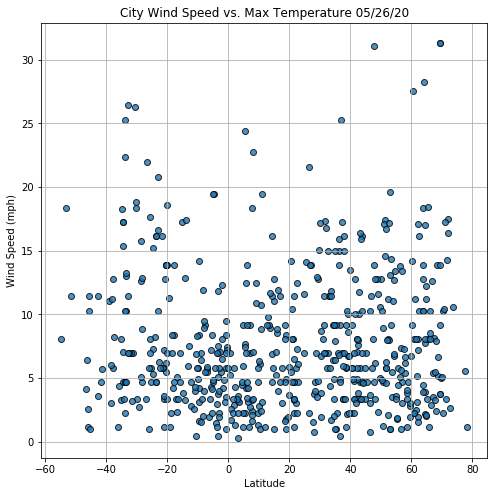

In [26]:
# Build the scatter plot for wind_speed vs. max temperature.

plt.figure(figsize=(8,8))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Wind Speed vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [43]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

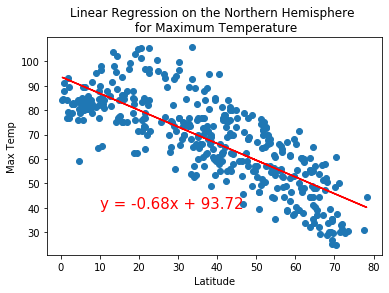

In [44]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

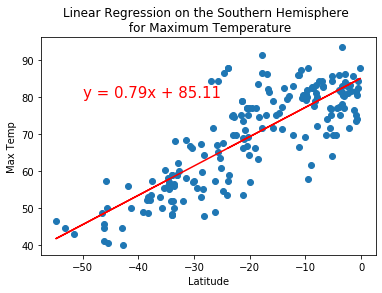

In [48]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

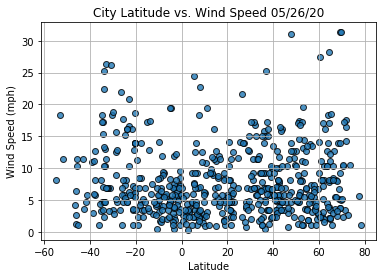

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()